## Building user-based recommendation model for Amazon

In [175]:
import pandas as pd

df = pd.read_csv('Amazon - Movies and TV Ratings.csv')
df

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AH3QC2PC1VTGP,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A3LKP6WPMP9UKX,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVIY68KEPQ5ZD,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A1CV1WROP5KTTW,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4843,A1IMQ9WMFYKWH5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4844,A1KLIKPUF5E88I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4845,A5HG6WFZLO10D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4846,A3UU690TWXCG1X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0


In [176]:
df.describe()

,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,Movie10,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
count,1.0,1.0,1.0,2.0,29.000000,1.0,1.0,1.0,1.0,1.0,...,5.000000,2.0,1.0,8.000000,3.000000,6.000000,1.0,8.000000,35.000000,13.000000
mean,5.0,5.0,2.0,5.0,4.103448,4.0,5.0,5.0,5.0,5.0,...,3.800000,5.0,5.0,4.625000,4.333333,4.333333,3.0,4.375000,4.628571,4.923077
std,NaN,NaN,NaN,0.0,1.496301,NaN,NaN,NaN,NaN,NaN,...,1.643168,0.0,NaN,0.517549,1.154701,1.632993,NaN,1.407886,0.910259,0.277350
min,5.0,5.0,2.0,5.0,1.000000,4.0,5.0,5.0,5.0,5.0,...,1.000000,5.0,5.0,4.000000,3.000000,1.000000,3.0,1.000000,1.000000,4.000000
25%,5.0,5.0,2.0,5.0,4.000000,4.0,5.0,5.0,5.0,5.0,...,4.000000,5.0,5.0,4.000000,4.000000,5.000000,3.0,4.750000,5.000000,5.000000
50%,5.0,5.0,2.0,5.0,5.000000,4.0,5.0,5.0,5.0,5.0,...,4.000000,5.0,5.0,5.000000,5.000000,5.000000,3.0,5.000000,5.000000,5.000000
75%,5.0,5.0,2.0,5.0,5.000000,4.0,5.0,5.0,5.0,5.0,...,5.000000,5.0,5.0,5.000000,5.000000,5.000000,3.0,5.000000,5.000000,5.000000
max,5.0,5.0,2.0,5.0,5.000000,4.0,5.0,5.0,5.0,5.0,...,5.000000,5.0,5.0,5.000000,5.000000,5.000000,3.0,5.000000,5.000000,5.000000


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4848 entries, 0 to 4847
Columns: 207 entries, user_id to Movie206
dtypes: float64(206), object(1)
memory usage: 7.7+ MB


In [178]:
df.iloc[:,1:].max(axis=0).sort_values(ascending=False)
# the highest rating value = 5

Movie1      5.0
Movie151    5.0
Movie127    5.0
Movie128    5.0
Movie129    5.0
           ... 
Movie60     1.0
Movie58     1.0
Movie67     1.0
Movie69     1.0
Movie144    1.0
Length: 206, dtype: float64

In [179]:
df.iloc[:,1:].min(axis=0).sort_values()
# the lower rating value = 1
# therfore; the rating scale in this dataset from 1 to 5

Movie103    1.0
Movie144    1.0
Movie158    1.0
Movie140    1.0
Movie138    1.0
           ... 
Movie56     5.0
Movie57     5.0
Movie61     5.0
Movie50     5.0
Movie1      5.0
Length: 206, dtype: float64

### <ins>Analysis Task</ins>
#### - Which movies have maximum views/ratings?
##### **Ans:** Movie127 has the number of views/ratings.

In [180]:
max_ratings = df.iloc[:,1:].sum(axis=0).sort_values(ascending=False)
max_ratings

Movie127    9511.0
Movie140    2794.0
Movie16     1446.0
Movie103    1241.0
Movie29     1168.0
             ...  
Movie154       1.0
Movie144       1.0
Movie69        1.0
Movie60        1.0
Movie67        1.0
Length: 206, dtype: float64

In [181]:
df.iloc[:,1:].isna().sum().sort_values()
# Movie127 has less null ratings values in compare to other movies

Movie127    2535
Movie140    4270
Movie16     4528
Movie103    4576
Movie29     4605
            ... 
Movie13     4847
Movie66     4847
Movie67     4847
Movie154    4847
Movie1      4847
Length: 206, dtype: int64

#### - What is the average rating for each movie? Define the top 5 movies with the maximum ratings.
##### **Ans:** (1) Average Rating for each movie:

In [182]:
ave_ratings = df.iloc[:,1:].mean().sort_values(ascending=False)
ave_ratings

Movie1      5.0
Movie66     5.0
Movie76     5.0
Movie75     5.0
Movie74     5.0
           ... 
Movie58     1.0
Movie60     1.0
Movie154    1.0
Movie45     1.0
Movie144    1.0
Length: 206, dtype: float64

##### (2) Top 5 movies with the maximum ratings:

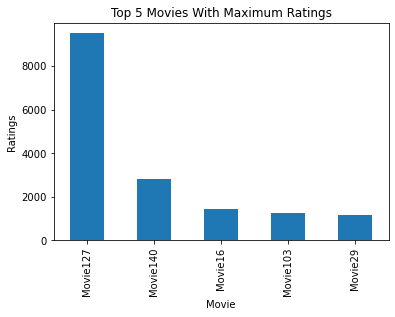

In [183]:
import matplotlib.pyplot as plt 
%matplotlib inline 
max_ratings[:5].plot(kind='bar')
plt.xlabel('Movie')
plt.ylabel('Ratings')
plt.title('Top 5 Movies With Maximum Ratings')
plt.show()

#### - Define the top 5 movies with the least audience.
##### **Ans:** Top 5 Moview with the least audience is Movie1, Movie84, Movie178, Movie80, and Movie78; ALL with only 1 user rating each

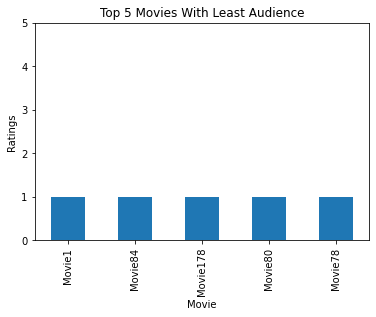

In [184]:
# With least audience means with fewest number people rating the movie.
Movies_with_less_ratings = df.shape[0] - df.iloc[:,1:].isna().sum().sort_values(ascending=False) 
Movies_with_less_ratings[:5].plot(kind='bar')
plt.xlabel('Movie')
plt.ylim([0, 5])
plt.ylabel('Ratings')
plt.title('Top 5 Movies With Least Audience')
plt.show()

In [185]:
Movies_with_less_ratings

Movie1         1
Movie84        1
Movie178       1
Movie80        1
Movie78        1
            ... 
Movie29      243
Movie103     272
Movie16      320
Movie140     578
Movie127    2313
Length: 206, dtype: int64

### <ins>Build Recommendation Model</ins>
#### - Divide the data into training and test data


In [186]:
n_users = df.user_id.unique().shape[0]
n_movies = df.shape[1] - 1 # -1 because there is 1 column for userID and the remaining columns all for movies 

traing_df = df.fillna(value=0).drop(['user_id'],axis=1,inplace=False)
traing_df.insert(0,'ID', range(0, df.shape[0]))
traing_df.head()

traing_df.head()

,ID,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [187]:
from sklearn.model_selection import train_test_split
trainData,testData = train_test_split(traing_df)

In [188]:
import numpy as np 
train_matrix  = np.zeros((n_users, n_movies))
test_matrix = np.zeros((n_users, n_movies))
train_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [200]:
for line in trainData.itertuples():
    for row in range(1,len(line)-1):
        train_matrix[line[0],row-1] = line[row+1]

for line in testData.itertuples():
    for row in range(1,len(line)-1):
        test_matrix[line[0],row-1] = line[row+1]


# import sys
# np.set_printoptions(threshold=sys.maxsize)



5.0

#### - Build a recommendation model on training data

In [211]:
from sklearn.metrics import pairwise_distances

User_Similarity = pairwise_distances(train_matrix, metric='cosine')
Movie_Similarity = pairwise_distances(train_matrix.transpose(), metric='cosine')
# Because it is a user-based recommendation system, we'll use only the User_Similarity 
User_Similarity.shape
User_Similarity.p

(4848, 4848)

#### - Make predictions on the test data

In [191]:
mean_user_rating = train_matrix.mean(axis=1)[:, np.newaxis] # reshape
ratings_diffrance = (train_matrix - mean_user_rating) # transpose  - mean of movies rating
user_pred = mean_user_rating + User_Similarity.dot(ratings_diffrance) / np.array([np.abs(User_Similarity).sum(axis=1)]).transpose()

user_pred.shape


(4848, 206)

In [216]:
from sklearn import metrics
import math
# define a function
def rmse(prediction, original):
    prediction = prediction[original.nonzero()].flatten() 
    original = original[original.nonzero()].flatten()
    return math.sqrt(metrics.mean_squared_error(prediction, original))


In [218]:
print('RMSE of the User-Based Collaborative Filter is : ' + str(rmse(user_pred, np.array(test_matrix))))

RMSE of the User-Based Collaborative Filter is : 3.8924300296361123
